![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the insurance dataset

insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
# Implement model creation and training here
# Use as many cells as you need
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [4]:
# Identify all columns except 'charges'
cols_to_check = insurance.columns.difference(['charges'])

# Find rows where all columns except 'charges' are NaN
result = insurance[insurance[cols_to_check].isna().all(axis=1)]
result

,age,sex,bmi,children,smoker,region,charges
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
insurance.dropna(inplace = True)

In [6]:
len(insurance)

1208

In [7]:
insurance.nunique()

age           80
sex            6
bmi          528
children      10
smoker         2
region         8
charges     1207
dtype: int64

In [8]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>, <Axes: >]], dtype=object)

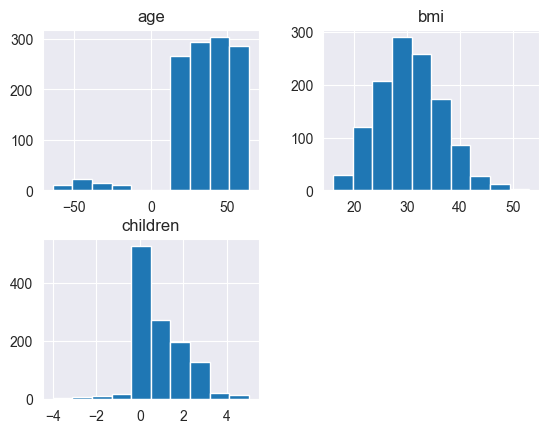

In [9]:
insurance.hist()

In [10]:
neg_age = insurance[insurance["age"] < 0]
neg_age

,age,sex,bmi,children,smoker,region,charges
5,-31.0,woman,25.740,0.0,no,southeast,$3756.6216
14,-27.0,male,42.130,0.0,yes,southeast,39611.7577
17,-23.0,male,23.845,0.0,no,northeast,$2395.17155
79,-41.0,female,32.965,-0.0,no,Northwest,$6571.02435
93,-35.0,male,34.770,2.0,no,Northwest,$5729.0053
179,-41.0,female,33.155,3.0,no,Northeast,$8538.28845
196,-39.0,female,32.800,0.0,no,Southwest,$5649.715
205,-28.0,female,28.880,1.0,no,Northeast,$4337.7352
211,-40.0,male,30.875,4.0,no,Northwest,$8162.71625
292,-25.0,M,45.540,2.0,yes,southeast,$42112.2356


In [11]:
insurance = insurance[~(insurance['age'] <0)]
insurance = insurance[~(insurance['children'] <0)]

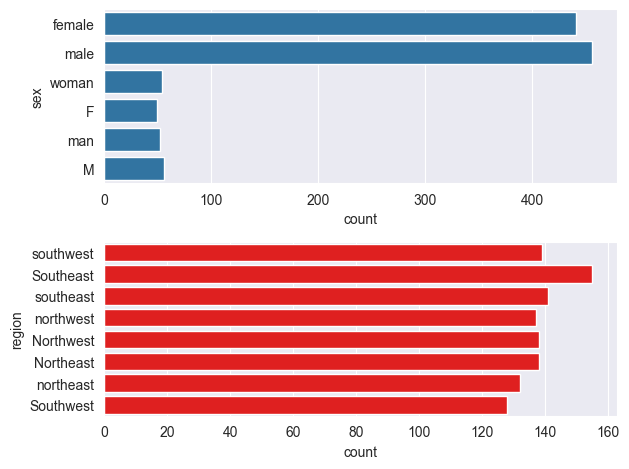

In [12]:
fig, ax = plt.subplots(2,1)
sns.countplot(insurance["sex"], ax = ax[0])
sns.countplot(insurance["region"], ax = ax[1], color = "red")
plt.tight_layout()

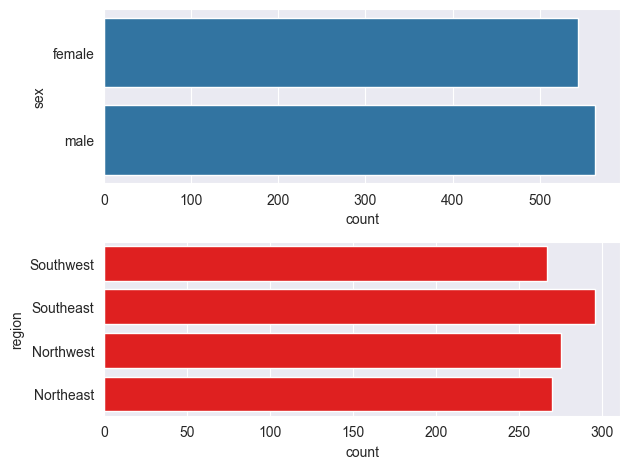

In [13]:
#change all to female and male
insurance.replace(["woman","F"], "female", inplace = True)
insurance.replace(["man","M"], "male", inplace = True)

#Clean region for capitalization
insurance["region"] = insurance["region"].apply(lambda x: x.title())
fig, ax = plt.subplots(2,1)
sns.countplot(insurance["sex"], ax = ax[0])
sns.countplot(insurance["region"], ax = ax[1], color = "red")
plt.tight_layout()

In [14]:
#convert charges to float by removing the first index dollar sign and converting to float 64
def convert_dollar_float(x):
    try:
        float(x[0])
    except ValueError:
        return float(x[1:])
    return float(x)
insurance["charges"] = insurance["charges"].apply(convert_dollar_float)

In [15]:
insurance.dropna(inplace = True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

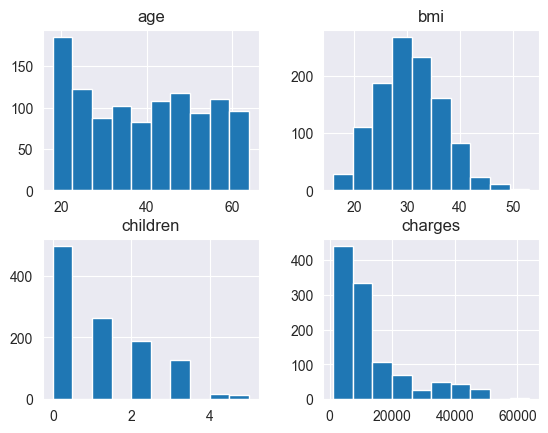

In [16]:
insurance.hist()

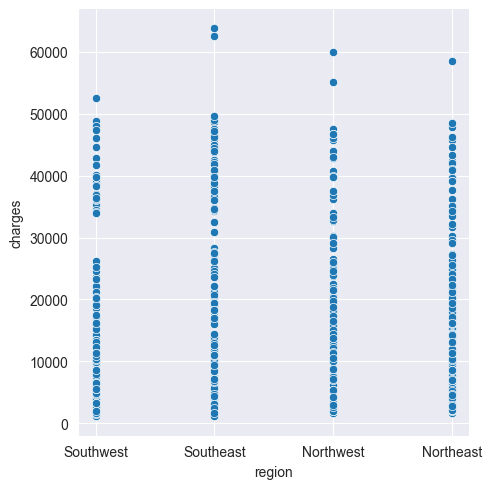

In [17]:
sns.relplot(x="region", y="charges", data=insurance)

## Analyzing charges
In typical medical bills, hospitals dont really charge customers based on their number of childrens.

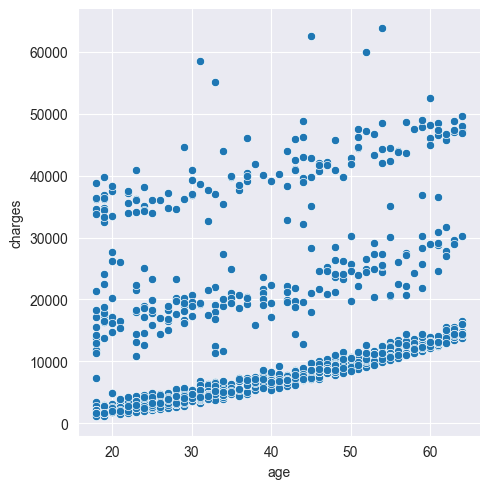

In [18]:
sns.relplot(x="age", y="charges", data=insurance)

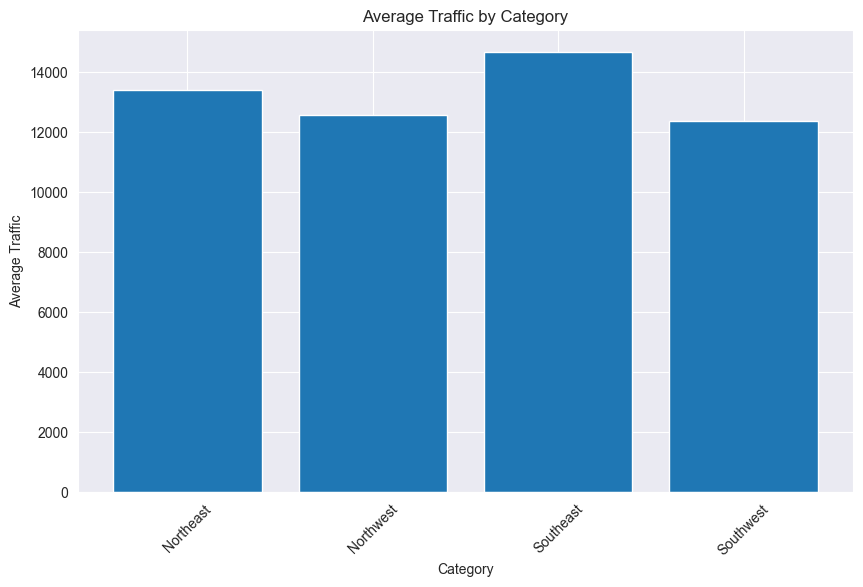

In [19]:
cat_reg = insurance.groupby('region')["charges"].mean().reset_index()

# Plot the traffic based on category
plt.figure(figsize=(10, 6))
plt.bar(cat_reg['region'], cat_reg['charges'])
plt.xlabel('Category')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Category')
plt.xticks(rotation=45)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = insurance.drop(["charges"], axis = 1)
y = insurance["charges"]

cat_col = ["smoker", "sex", "region", 'children']
X_cat = pd.get_dummies(X[cat_col], drop_first = True)

numerical_columns = [i for i in list(X.columns) if i not in set(cat_col)]
scaler = StandardScaler()
X_num = X[numerical_columns]
X_scaled = scaler.fit_transform(X_num)
X_processed = pd.concat([X_num, X_cat], axis=1)
model = LinearRegression()
scores = cross_val_score(model, X_processed, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation of scores:", scores.std())

Cross-validation scores: [0.73057509 0.72403127 0.79151061 0.71602169 0.75740017]
Mean score: 0.7439077648788862
Standard deviation of scores: 0.027562816994551567


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared score:', r2_score(y_test, y_pred))
r2_score = r2_score(y_test, y_pred)

Mean squared error: 31020137.55769883
Root mean squared error: 5569.572475307134
R-squared score: 0.7678309153181793


In [22]:
def transform_data(data):
    data['region'] = data['region'].apply(lambda x: x.title())
    data_cat = pd.get_dummies(data[cat_col], drop_first = True)
    data_num = data[numerical_columns]
    data_scaled = scaler.transform(data_num)
    return pd.concat([data_num, data_cat], axis=1)

def predict_data(data, model):
    transformed_data = transform_data(data)
    return model.predict(transformed_data)

In [31]:
validation_data = pd.read_csv('validation_dataset.csv')
validation_data['predicted_charges'] = predict_data(validation_data, model)
# If needed, handle any negative values by replacing them with the minimum basic charge, set at 1000.
validation_data.loc[validation_data["predicted_charges"] < 1000, "predicted_charges"] = 1000
validation_data.to_csv('validation_dataset.csv', index=False)

In [34]:
validation_data[validation_data['predicted_charges'] == 1000]

,age,sex,bmi,children,smoker,region,predicted_charges
20,23.0,male,18.715,0.0,no,Northwest,1000.0
38,18.0,male,21.780,2.0,no,Southeast,1000.0
